<a href="https://colab.research.google.com/github/tutalae/TensorFlow/blob/main/practice_tensorflow_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [61]:
# create tensor constant
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [62]:
# check number of dimension
scalar.ndim

0

In [63]:
# create vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [64]:
# check number of dimension
vector.ndim

1

In [65]:
# create matrix
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [66]:
# check number of dimension
matrix.ndim

2

In [67]:
# create another matrix
another_matrix = tf.constant([[10, 7],
                      [7, 10],
                      [10, 7]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 7., 10.],
       [10.,  7.]], dtype=float16)>

In [68]:
# create tf.variable
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [69]:
# changeable_tensor[0] = 7

In [70]:
# try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [71]:
 # create random tensor
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2)) # normal distrubution
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [72]:
 # create random tensor
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [73]:
# shuffle the order of elements in a tensor
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [5, 6]])

# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5,  6],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [74]:
# create a tensor of all ones
tf.ones([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [75]:
# create a tensor of all zeros
tf.zeros(shape = [3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [76]:
# turn numpy to tensor
# tensor can run on gpu different from numpy

import numpy as np
numpy_a = np.arange(1, 25, dtype = np.float)
numpy_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [77]:
A= tf.constant(numpy_a)
A

<tf.Tensor: shape=(24,), dtype=float64, numpy=
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])>

In [78]:
A_change_shape = tf.constant(numpy_a, shape = (3, 2, 4))
A_change_shape

<tf.Tensor: shape=(3, 2, 4), dtype=float64, numpy=
array([[[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.]],

       [[ 9., 10., 11., 12.],
        [13., 14., 15., 16.]],

       [[17., 18., 19., 20.],
        [21., 22., 23., 24.]]])>

In [79]:
A_change_shape.ndim

3

In [80]:
add_axis_tensor = A_change_shape[..., tf.newaxis]
add_axis_tensor

<tf.Tensor: shape=(3, 2, 4, 1), dtype=float64, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.]],

        [[ 5.],
         [ 6.],
         [ 7.],
         [ 8.]]],


       [[[ 9.],
         [10.],
         [11.],
         [12.]],

        [[13.],
         [14.],
         [15.],
         [16.]]],


       [[[17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.]]]])>

In [81]:
tf.expand_dims(A_change_shape, axis = -1)

<tf.Tensor: shape=(3, 2, 4, 1), dtype=float64, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.]],

        [[ 5.],
         [ 6.],
         [ 7.],
         [ 8.]]],


       [[[ 9.],
         [10.],
         [11.],
         [12.]],

        [[13.],
         [14.],
         [15.],
         [16.]]],


       [[[17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.]]]])>

In [82]:
tf.expand_dims(A_change_shape, axis = 0)

<tf.Tensor: shape=(1, 3, 2, 4), dtype=float64, numpy=
array([[[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.]],

        [[ 9., 10., 11., 12.],
         [13., 14., 15., 16.]],

        [[17., 18., 19., 20.],
         [21., 22., 23., 24.]]]])>

In [83]:
# basix operation
# +, -, *, /

In [84]:
tensor = tf.constant([[3, 2], [2,  3]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13, 12],
       [12, 13]], dtype=int32)>

In [85]:
tensor # tensor is unchanged

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [2, 3]], dtype=int32)>

In [86]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-7, -8],
       [-8, -7]], dtype=int32)>

In [87]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 20],
       [20, 30]], dtype=int32)>

In [88]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 20],
       [20, 30]], dtype=int32)>

In [89]:
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.3, 0.2],
       [0.2, 0.3]])>

In [90]:
tensor2 = tensor + 1
tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 3],
       [3, 4]], dtype=int32)>

In [91]:
tensor + tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[7, 5],
       [5, 7]], dtype=int32)>

In [92]:
tensor - tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-1, -1],
       [-1, -1]], dtype=int32)>

In [93]:
tensor / tensor2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.75      , 0.66666667],
       [0.66666667, 0.75      ]])>

In [94]:
tensor * tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  6],
       [ 6, 12]], dtype=int32)>

In [95]:
# dot product
tf.matmul(tensor,  tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13, 12],
       [12, 13]], dtype=int32)>

In [96]:
numpy_b = np.arange(0, 12)
b_change_shape = tf.constant(numpy_b, shape = (4, 3))
b_change_shape

<tf.Tensor: shape=(4, 3), dtype=int64, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])>

In [97]:
c_change_shape = tf.constant(numpy_b, shape = (3, 4))
c_change_shape

<tf.Tensor: shape=(3, 4), dtype=int64, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])>

In [98]:
 b_change_shape @ c_change_shape

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218]])>

In [99]:
c_change_shape @ b_change_shape

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])>

In [100]:
d_change_shape = tf.constant(numpy_b, shape = (6, 2))
d_change_shape

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])>

In [101]:
# c_change_shape @ d_change_shape
# this will error

In [102]:
tf.transpose(d_change_shape)

<tf.Tensor: shape=(2, 6), dtype=int64, numpy=
array([[ 0,  2,  4,  6,  8, 10],
       [ 1,  3,  5,  7,  9, 11]])>

In [103]:
# create tensor
B = tf.constant([1.2, 2.3])
B.dtype

tf.float32

In [104]:
C = tf.cast(tf.constant([1, 2]), 'float32')
C.dtype

tf.float32

In [105]:
D = B + C
D.dtype

tf.float32

In [106]:
# tf.cast
C = tf.cast(B, dtype = tf.float32)
C.dtype

D = B + C
D.dtype

tf.float32

In [107]:
## aggregating tensors

In [108]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.4, 4.6], dtype=float32)>

In [109]:
tf.reduce_max(D)

<tf.Tensor: shape=(), dtype=float32, numpy=4.6>

In [110]:
tf.reduce_min(D)

<tf.Tensor: shape=(), dtype=float32, numpy=2.4>

In [111]:
tf.reduce_mean(D)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5>

In [112]:
tf.reduce_sum(D)

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [113]:
import tensorflow_probability as tfp

In [114]:
tfp.stats.variance(D)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2099998>

In [115]:
tfp.stats.stddev(D)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0999999>

In [116]:
# find position maximum and minmimum

F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6757742 , 0.42782462, 0.8389976 , 0.46794033, 0.64552104,
       0.31993628, 0.48109746, 0.09311259, 0.755937  , 0.37136972,
       0.9928279 , 0.06814182, 0.30521894, 0.26913774, 0.38695872,
       0.47035694, 0.32829916, 0.46479547, 0.85159826, 0.53029406,
       0.26032794, 0.26547253, 0.8447021 , 0.44723654, 0.5172118 ,
       0.9741206 , 0.80341744, 0.989957  , 0.8527914 , 0.93000317,
       0.30989623, 0.38789523, 0.08826947, 0.55321467, 0.47394204,
       0.02351856, 0.55078197, 0.5936525 , 0.23092651, 0.11744547,
       0.91484845, 0.92672586, 0.5089294 , 0.61791   , 0.5214199 ,
       0.93718207, 0.78491235, 0.1922257 , 0.7479923 , 0.31956828],
      dtype=float32)>

In [117]:
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [118]:
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9928279>

In [119]:
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=35>

In [120]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.023518562>

In [121]:
## one-hot
some_list = [0, 1, 2, 3]
depth = 4

# one hot encode out list
tf.one_hot(some_list, depth)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [122]:
tf.one_hot(some_list, depth, on_value = 2, off_value = 4)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[2, 4, 4, 4],
       [4, 2, 4, 4],
       [4, 4, 2, 4],
       [4, 4, 4, 2]], dtype=int32)>

In [123]:
numpy_a = np.arange(1, 25, dtype = np.float)
numpy_a = numpy_a**2
numpy_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100., 121.,
       144., 169., 196., 225., 256., 289., 324., 361., 400., 441., 484.,
       529., 576.])

In [124]:
tensor_a = tf.constant(numpy_a, shape = (4, 6))
tensor_a

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[  1.,   4.,   9.,  16.,  25.,  36.],
       [ 49.,  64.,  81., 100., 121., 144.],
       [169., 196., 225., 256., 289., 324.],
       [361., 400., 441., 484., 529., 576.]])>

In [125]:
# square root
tf.sqrt(tensor_a)

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.],
       [19., 20., 21., 22., 23., 24.]])>

In [126]:
# square root
tf.math.log(tensor_a)

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[0.        , 1.38629436, 2.19722458, 2.77258872, 3.21887582,
        3.58351894],
       [3.8918203 , 4.15888308, 4.39444915, 4.60517019, 4.79579055,
        4.9698133 ],
       [5.12989871, 5.27811466, 5.4161004 , 5.54517744, 5.66642669,
        5.78074352],
       [5.88887796, 5.99146455, 6.08904488, 6.18208491, 6.27098843,
        6.35610766]])>

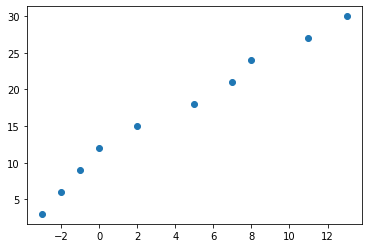

In [127]:
# regression

import matplotlib.pyplot as plt

# create features
X = np.array([-3, -2, -1, 0, 2, 5, 7, 8, 11, 13])

y = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])

# visualize 
plt.scatter(X,y)

In [128]:
# create a demo tensor

In [129]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [130]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [131]:
# turn Numpy array of tensors
X =tf.constant(X, dtype = 'float32')
y =tf.constant(y, dtype = 'float32')
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-3., -2., -1.,  0.,  2.,  5.,  7.,  8., 11., 13.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.], dtype=float32)>)

In [132]:
X.ndim, y.ndim

(1, 1)

In [133]:
# modeling

# 1. create model - input, output, hidden layer
# 2. compiling model - define loss function, optimizer, evaluation
# 3. fitting model

In [166]:
Model = tf.keras.Sequential()
Model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
Model.add(tf.keras.layers.Dense(1))
Model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
Model.metrics_names

Model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 363.6068 - mae: 16.8020
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 363.4353 - mae: 16.7985
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 363.2643 - mae: 16.7951
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 363.0941 - mae: 16.7916
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 362.9243 - mae: 16.7881


In [167]:
# make a predictio
model.predict([17.0])

array([[-20.117847]], dtype=float32)

In [168]:
inputs = tf.keras.layers.Input(shape=(1,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.metrics_names

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 730ms/step - loss: 130.6322 - mae: 11.2595
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 130.5033 - mae: 11.2545
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 130.3747 - mae: 11.2495
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 130.2461 - mae: 11.2445
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 130.1176 - mae: 11.2395


In [160]:
 X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-3., -2., -1.,  0.,  2.,  5.,  7.,  8., 11., 13.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.], dtype=float32)>)

In [169]:
# make a predictio
model.predict([17.0])

array([[22.362215]], dtype=float32)

In [165]:
# improve model
# 1. create model - add more layers, activation function
# 2. compiling a model - change optimization, learning rate
# 3. fitt a model - more epoch, more data